<a href="https://colab.research.google.com/github/Mollylst/DeepFake-Project/blob/main/PCA_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!unzip -uq '/content/drive/MyDrive/FFHQ data 8:1:1/train-fake-stylegan1.zip' -d /content/dataset
!unzip -uq '/content/drive/MyDrive/FFHQ data 8:1:1/train_real.zip' -d /content/dataset

In [16]:
!rm -rf my_che dataset

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

def read_directory(directory_name):
    faces_addr = []
    for filename in os.listdir(directory_name):
        faces_addr.append(directory_name + "/" + filename)
    return faces_addr

faces = []
for i in range(0,2):
    faces_addr = read_directory('/content/dataset/'+str(i))
    for addr in faces_addr:
        faces.append(addr)

images = []
labels = []
for index,face in enumerate(faces):
    image = cv2.imread(face,0)
    images.append(image)
    labels.append(int(index/10000))
print(len(labels))
print(len(images))
print(type(images[0]))
print(labels)

18000
18000
<class 'numpy.ndarray'>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

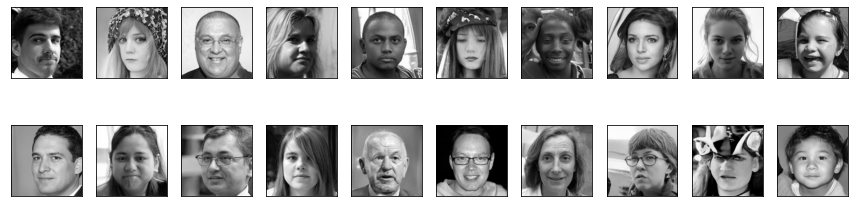

In [19]:
fig, axes = plt.subplots(2,10
                       ,figsize=(15,4)
                       ,subplot_kw = {"xticks":[],"yticks":[]}
                       )
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i+200],cmap="gray") 

In [20]:
image_data = []
for image in images:
    data = image.flatten()
    image_data.append(data)
print(image_data[0].shape)

(16384,)


In [21]:
X = np.array(image_data)
y = np.array(labels)
print(type(X))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
(18000, 16384)
(18000,)


In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.DataFrame(X)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,223,224,225,223,223,222,222,222,223,224,223,223,223,224,223,223,223,221,220,220,219,219,218,214,215,214,212,210,208,209,206,195,173,148,116,87,95,119,127,114,...,50,49,44,51,56,52,47,49,40,28,41,53,50,51,48,42,40,38,35,41,43,44,46,43,42,46,37,39,44,41,39,41,45,51,55,103,148,152,155,149
1,200,196,184,173,169,166,165,169,188,200,191,181,177,176,173,171,175,188,194,183,174,169,166,170,177,177,176,172,170,172,173,166,160,165,169,171,169,167,169,172,...,170,150,152,158,176,189,193,192,197,192,167,190,103,122,127,150,197,193,220,179,145,115,99,92,109,139,148,129,142,143,145,160,106,89,171,215,158,65,59,86
2,179,177,177,175,173,172,170,168,169,168,166,164,163,162,161,160,159,159,158,158,158,158,162,163,162,165,159,150,138,128,109,91,95,99,75,62,50,45,45,41,...,171,174,178,172,170,172,175,180,183,184,184,184,185,183,182,181,181,184,186,186,188,185,180,179,170,161,154,152,145,133,121,103,99,109,98,94,100,95,96,93
3,126,107,104,104,102,104,105,114,115,111,113,108,106,105,105,104,105,108,110,110,109,109,109,108,108,109,108,110,114,114,121,151,140,115,113,119,122,124,127,124,...,220,167,121,174,199,211,92,68,54,72,75,58,85,140,63,32,25,39,52,55,53,54,56,60,61,66,69,62,47,29,56,71,69,140,147,130,156,154,167,199
4,11,9,9,8,8,8,8,9,9,8,8,8,9,8,8,8,8,7,7,7,7,7,7,6,7,7,7,7,8,9,10,10,11,12,12,13,14,14,14,13,...,10,10,10,11,11,10,10,11,9,6,7,9,10,4,3,2,3,4,5,10,21,12,12,17,17,19,18,12,11,16,11,9,11,16,15,13,12,11,10,11


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [24]:
pca=PCA(n_components=650)
pca.fit(x_train)
PCA(copy=True, iterated_power='auto', n_components=650, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(14400, 650)
(3600, 650)


(650, 16384)


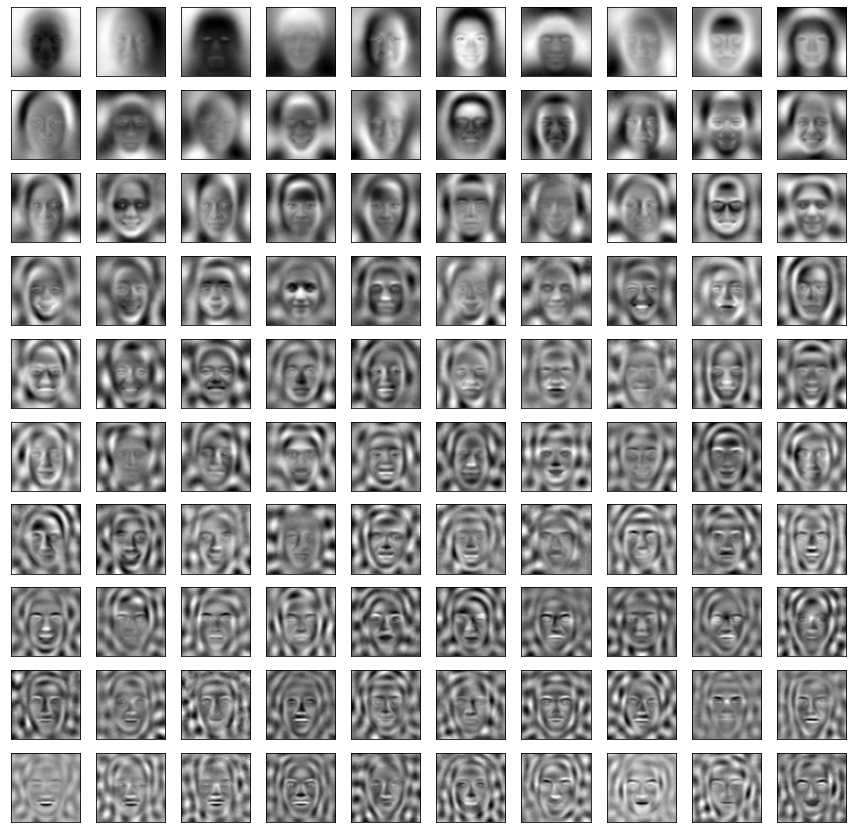

In [25]:
V = pca.components_
V.shape
print(pca.components_.shape)
fig, axes = plt.subplots(10,10,figsize=(15,15),subplot_kw = {"xticks":[],"yticks":[]}) 

for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(128,128),cmap="gray") 

In [26]:
pca.explained_variance_ratio_

array([2.44370046e-01, 8.40419540e-02, 7.62892740e-02, 6.33195731e-02,
       4.12634040e-02, 4.00922280e-02, 2.75562692e-02, 2.00765653e-02,
       1.96283255e-02, 1.52562936e-02, 1.23030745e-02, 1.18670492e-02,
       1.11529173e-02, 9.64070217e-03, 9.25588907e-03, 8.52622903e-03,
       7.38992432e-03, 7.14295350e-03, 6.78394380e-03, 5.92952458e-03,
       5.71161941e-03, 5.43672104e-03, 5.11523974e-03, 4.78554726e-03,
       4.60671874e-03, 4.19877119e-03, 3.89357139e-03, 3.82217189e-03,
       3.61104039e-03, 3.54404522e-03, 3.50123290e-03, 3.21816538e-03,
       3.14028409e-03, 3.02619689e-03, 2.92062748e-03, 2.71813943e-03,
       2.67878059e-03, 2.55131227e-03, 2.54972435e-03, 2.45232513e-03,
       2.41488922e-03, 2.25529481e-03, 2.17089183e-03, 2.13832929e-03,
       2.04696749e-03, 2.00934123e-03, 1.96080719e-03, 1.86865289e-03,
       1.82044217e-03, 1.78252163e-03, 1.72149297e-03, 1.67507552e-03,
       1.66143306e-03, 1.61897942e-03, 1.57393256e-03, 1.51843944e-03,
      

In [27]:
pca.explained_variance_ratio_.sum()

0.9593106572596011

Text(0, 0.5, '% Cumulative Variance Explained')

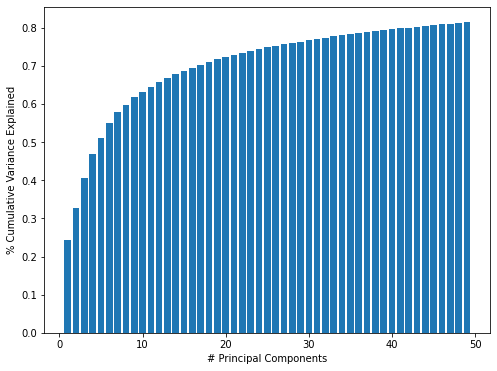

In [ ]:
explained_variance_ratio = []
for i in range(1,50): 
    pca=PCA(n_components=i).fit(x_train)
    explained_variance_ratio.append(pca.explained_variance_ratio_.sum())

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,50), explained_variance_ratio)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained')

#plt.plot(range(1,50),explained_variance_ratio)
#plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(x_train_pca, y_train)
LR = logreg.score(x_test_pca, y_test)
print("LR: "+str(LR))

LR: 0.9036111111111111
